Kasu honetan IB neurona dugu.

Erabiliko diren moduluak:

In [1]:
import math
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.gridspec as gridspec
import matplotlib.patches as mpatches

### IB Neuronarako erabiliko diren konstanteen multzoa

Erabiliko diren aldagaien laburbilduma:

|Aldagaia|Definizioa|Unitatea|
|--------|-----------|-------|
|$t_{max}$ |Simulazioa denbora maximoa|$ms$|
|$\Delta t$|Denboraren diskretizazioa |$ms$|
|$\tau_{max}$ |Parametro esperimentala|$s$|
|$C_{m}$   |Mintz kapazitatea         |$\frac{\mu F}{cm^{2}}$|
|$E_{Na}$  |Inbertsio potentziala, sodio kanaletarako|$mV$|
|$E_{K}$   |Inbertsio potentziala, potasio kanaletarako|$mV$|
|$E_{L}$   |Inbertsi potentziala|$mV$|
|$E_{Ca}$   |Inbertsi potentziala, kaltzio kanaletarako|$mV$|
|$g_{Na}$  |Konduktantzia espezifikoa, sodio korronte azkarrerako|$\frac{mS}{cm^{2}}$|
|$g_{K}$   |Konduktantzia espezifikoa, potasio korronte iraukorrerako|$\frac{mS}{cm^{2}}$|
|$g_{M}$   |Konduktantzia espezifikoa, potasio korronte geldorako|$\frac{mS}{cm^{2}}$|
|$g_{L}$   |Konduktantzia espezifikoa|$\frac{mS}{cm^{2}}$|
|$g_{Ca}$   |Konduktantzia espezifikoa, kaltzio korronte leherketarako|$\frac{mS}{cm^{2}}$|
|$i_{mean}$|Batez-besteko intentsitate bat finkatu|$\frac{\mu A}{cm^{2}}$|
|$V_{rest}$|Egoera egonkorreko mintz potentziala|$mV$|
|$V_{Th}$|Atari potentziala|$mV$|

In [2]:
#Parametroak finkatu#####
t_max=400      # ms
delta_t=0.04   # ms
tau_max=500.0  # s
C_m=3.14       # micro F/cm^2 (c_m/(L*d)=C_m)
E_Na=50.00     # mV
E_K=-90.00     # mV
E_L=-70.00     # mV
E_Ca=120.0     # mV
g_Na=50.0      # mS/cm^2
g_K=5.0        # mS/cm^2
g_M=0.07       # mS/cm^2
g_L=0.1       # mS/cm^2
g_Ca=0.1       # mS/cm^2  
i_mean=5.0     # microA/cm^2
V_rest=-65.0   # mV
v_th=-40.0     # mV

### Funtzio laguntzaileen inplementazioa

$$\alpha_{m}=\frac{-0.32(v-v_{Th}-13)}{\exp [-(v-v_{Th}-13)/4]-1}$$

$$\beta_{m}=\frac{0.28(v-v_{Th}-40)}{\exp [(v-v_{Th}-40)/5]-1}$$

$$\alpha_{h}=0.128\exp [-(v-v_{Th}-17)/18]$$

$$\beta_{h}=\frac{4}{1+ exp[-(v-v_{Th}-40)/5]}$$

$$\alpha_{n}=\frac{-0.032(v-v_{Th}-15)}{\exp [-(v-v_{Th}-15)/5]-1}$$

$$\beta_{n}=0.5 \exp[-(v-v_{Th}-10)/40]$$

$$p_{\infty}(v)=\frac{1}{1+\exp[-(v+35)/10]}$$

$$\tau_{p}(v)=\frac{\tau_{max}}{3.3\exp[(v+35)/20]+\exp[-(v+35)/20]}$$

$$\alpha_{q}=\frac{0.055(-27-v)}{\exp [(-27-v)/3.9]-1}$$

$$\beta_{q}=0.94 \exp[(-75-v)/17]$$

$$\alpha_{r}=0.000457 \exp[(-13-v)/50]$$

$$\beta_{r}=\frac{0.0065}{1+ exp[(-15-v)/28]}$$

Erabiliko den intentsitatearen forma ere sartu dugu kasu honetan. $i_{e}$-ren balioa finko mantendu da $t_{max}$ simulazio ia osorako. Azkenengo 25 ms-tan intentsitate negatibo bat sartu zaio neuronari. Azken honen helburua irudian ekintza potentzialei amaiera bat ematea da.

In [3]:
def Id(t):
    if t<=375:
        return i_mean
    else:
        return -1.0
        
def alpha_m(v):
    return -0.32 * (v - v_th - 13.0) / (np.exp(-(v - v_th - 13.0) / 4.0) - 1.0)

def beta_m(v):
    return 0.28 * (v - v_th - 40.0) / (np.exp((v - v_th - 40.0) / 5.0) - 1.0)

def alpha_h(v):
    return 0.128 * np.exp(-(v - v_th - 17.0)/18.0)

def beta_h(v):
    return 4.0 / (1.0 + np.exp(-(v - v_th - 40.0) / 5.0))

def alpha_n(v):
    return -0.032 * (v - v_th - 15.0) / (np.exp(-(v - v_th - 15.0) / 5.0) - 1.0)

def beta_n(v):
    return 0.5 * np.exp(-(v - v_th - 10.0) / 40.0)

def p_infty(v):
    return 1.0 / (1.0 + np.exp(-(v + 35.0) / 10.0))

def tau_p(v):
    return tau_max / (3.3 * np.exp((v + 35.0) / 20.0) + np.exp(-(v + 35.0) / 20.0))

def alpha_q(v):
    return 0.055 * (-27.0 - v) / (np.exp((-27.0 - v) / 3.8) - 1.0)

def beta_q(v):
    return 0.94 * np.exp((-75.0 - v) / 17.0)

def alpha_r(v):
    return 0.000457 * np.exp((-13.0 - v) / 50.0)

def beta_r(v):
    return 0.0065 / (np.exp((-15.0 - v) / 28.0) + 1.0)

### Bektoreak eta hasierako balioak finkatu

In [4]:
#Denbora eremu osoa finkatzen dugu. 0 s-tik hasiz, delta_t diskretizazio denbora aldiunez t_max aldiunerarte
t_eremua=np.arange(0,t_max,delta_t)
#Luzera finkatu
step=len(t_eremua)

#Vt bektorea finkatu
Vt=np.ones([step])

#Fase espaziorako bektoreaa finkatu
V_dot=np.ones([step])

#nt, mt, ht bektoreak finkatu
nt=np.ones([step])
mt=np.ones([step])
ht=np.ones([step])
pt=np.ones([step])
qt=np.ones([step])
rt=np.ones([step])

#Fase espaziorako bektoreak finkatu
n_dot=np.ones([step])
m_dot=np.ones([step])
h_dot=np.ones([step])
p_dot=np.ones([step])
q_dot=np.ones([step])
r_dot=np.ones([step])

Hasierako egoerak:
$$n(0)=\frac{\alpha_{n}}{\alpha_{n} + \beta_{n}}|_{V_{rest}}$$

$$m(0)=\frac{\alpha_{m}}{\alpha_{m} + \beta_{m}}|_{V_{rest}}$$

$$h(0)=\frac{\alpha_{h}}{\alpha_{h} + \beta_{h}}|_{V_{rest}}$$

$$p(0)=p_{\infty}|_{V_{rest}}$$

$$q(0)=\frac{\alpha_{q}}{\alpha_{q} + \beta_{q}}|_{V_{rest}}$$

$$r(0)=\frac{\alpha_{r}}{\alpha_{r} + \beta_{r}}|_{V_{rest}}$$

In [5]:
# Hasierako balioak
Vt[0]=V_rest
nt[0]= alpha_n(V_rest) / (alpha_n(V_rest) + beta_n(V_rest))
mt[0]= alpha_m(V_rest) / (alpha_m(V_rest) + beta_m(V_rest))
ht[0]= alpha_h(V_rest) / (alpha_h(V_rest) + beta_h(V_rest))
pt[0]= p_infty(V_rest)
qt[0]= alpha_q(V_rest) / (alpha_q(V_rest) + beta_q(V_rest))
rt[0]= alpha_r(V_rest) / (alpha_r(V_rest) + beta_r(V_rest))

### Gobernu ekuazioen ebazpena
Euler-en aurrerazko formula erabiliz diskretizazioa denboran egiteko:


$$v^{i+1}=v^{i}+\frac{\Delta t}{C_{m}}[I^{i}-\overline{g_{Na}}(m^{3})^{i}h^{i}(v^{i}-E_{Na})-\overline{g_{K}}(n^{4})^{i}(v^{i}-E_{K})-\overline{g_{M}}p^{i}(v^{i}-E_{K})-\overline{g_{Ca}}(q^{2})^{i}r^{i}(v^{i}-E_{Ca})-\overline{g_{L}}(v^{i}-E_{L})]$$

$$n^{i+1}=n^{i}+\Delta t[\alpha_{n}(v^{i})(1-n^{i})-\beta_{n}(v^{i})n^{i}]$$

$$m^{i+1}=m^{i}+\Delta t[\alpha_{m}(v^{i})(1-m^{i})-\beta_{m}(v^{i})m^{i}]$$

$$h^{i+1}=h^{i}+\Delta t[\alpha_{h}(v^{i})(1-h^{i})-\beta_{h}(v^{i})h^{i}]$$

$$p^{i+1}=p^{i}+\Delta t[\frac{p_{\infty}(v^{i})-p^{i}}{\tau_{p}(v^{i})}]$$

$$q^{i+1}=q^{i}+\Delta t[\alpha_{q}(v^{i})(1-q^{i})-\beta_{q}(v^{i})q^{i}]$$

$$r^{i+1}=r^{i}+\Delta t[\alpha_{r}(v^{i})(1-r^{i})-\beta_{r}(v^{i})r^{i}]$$

In [6]:
for i in range(0, step-1) :
    
    nt[i + 1] = nt[i] + delta_t * (alpha_n(Vt[i]) * (1.0 - nt[i]) - beta_n(Vt[i]) * nt[i])
    mt[i + 1] = mt[i] + delta_t * (alpha_m(Vt[i]) * (1.0 - mt[i]) - beta_m(Vt[i]) * mt[i])
    ht[i + 1] = ht[i] + delta_t * (alpha_h(Vt[i]) * (1.0 - ht[i]) - beta_h(Vt[i]) * ht[i])
    pt[i + 1] = pt[i] + delta_t * ((p_infty(Vt[i]) - pt[i]) / tau_p(Vt[i]))
    qt[i + 1] = qt[i] + delta_t * (alpha_q(Vt[i]) * (1.0 - qt[i]) - beta_q(Vt[i]) * qt[i])
    rt[i + 1] = rt[i] + delta_t * (alpha_r(Vt[i]) * (1.0 - rt[i]) - beta_r(Vt[i]) * rt[i])
    Vt[i + 1] = Vt[i] + (delta_t/C_m) * (Id(i*delta_t)-g_Na * mt[i] ** 3 * ht[i] * (Vt[i]-E_Na) - g_K * nt[i] ** 4 * (Vt[i]-E_K)- g_Ca * qt[i]** 2 * rt[i] * (Vt[i] - E_Ca) - g_M * pt[i] * (Vt[i] - E_K) - g_L * (Vt[i]-E_L)) 

Ploteatu:

<Figure size 432x288 with 0 Axes>

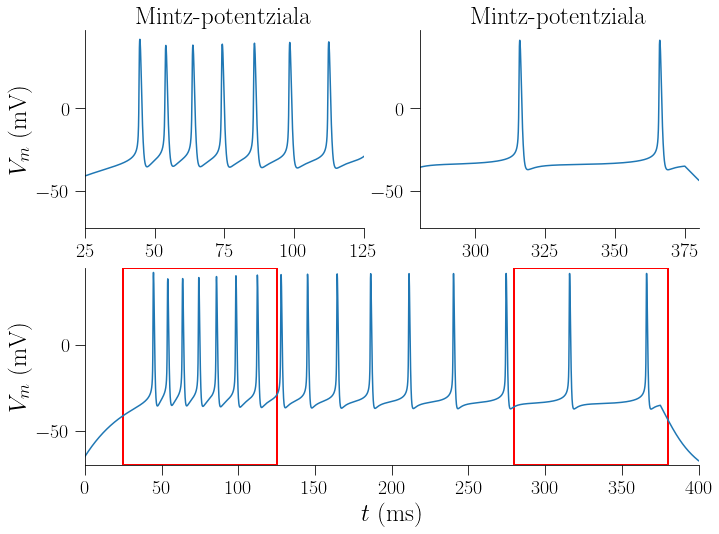

In [7]:
#################################  ### 00 ###

plt.rc('text', usetex=True)

#################################


fig = plt.figure()

plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.top'] = False

#################################  ### 01 ###
fontsize = 25
labelsize = 20
#################################

fig, ax1 = plt.subplots(figsize=(11, 8))
ax1 = plt.subplot(212)
ax1.set_xlim(0,400)
ax1.set_ylim(-70,45)
ax1.plot(t_eremua, Vt)
ax1.set_xlabel(r'$t \textrm{ (ms)}$',fontsize=fontsize)
ax1.set_ylabel(r'$V_{m} \textrm{ (mV)}$',fontsize=fontsize)
left, bottom, width, height = (25, -70, 100, 115)
rect=mpatches.Rectangle((left,bottom),width,height, 
                        fill=False,
                        color="red",
                       linewidth=2)
                       #facecolor="red")
plt.gca().add_patch(rect)
left, bottom, width, height = (280, -70, 100, 115)
rect=mpatches.Rectangle((left,bottom),width,height, 
                        fill=False,
                        color="red",
                       linewidth=2)
                       #facecolor="red")
plt.gca().add_patch(rect)

ax2 = plt.subplot(221)
ax2.set_xlim(25,125)
ax2.plot(t_eremua, Vt)
ax2.set_ylabel(r'$V_{m}\textrm{ (mV)}$',fontsize=fontsize)
fig, ax2.set_title(r'$\textrm{Mintz-potentziala}$',fontsize=fontsize)

ax3 = plt.subplot(222)
ax3.set_xlim(280,380)
ax3.plot(t_eremua, Vt)
#ax3.set_ylabel(r'$V_{m} \quad \textrm{(mV)}$',fontsize=fontsize)
fig, ax3.set_title(r'$\textrm{Mintz-potentziala}$',fontsize=fontsize)

######################################  ### 04 ###
axes_fig = [ax1,ax2,ax3] # irudiak dazkanaren arabera

for i in axes_fig:
    i.tick_params(axis='y', labelsize=labelsize, pad=5, length=10);
    i.tick_params(axis='x', labelsize=labelsize, pad=5, length=10);



plt.savefig('IB_Eredua_Vm.pdf', format='pdf', dpi=180,bbox_inches="tight")
plt.show()